<a href="https://colab.research.google.com/github/saadan1234/Optical-Network-and-Technologies/blob/main/NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Import

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd

file_path = '/content/drive/MyDrive/DataSet_EU_3k_5k.xlsx'
data = pd.read_excel(file_path)
data.head()

,Power_1,Power_2,Power_3,Power_4,Power_5,Power_6,Power_7,Power_8,Power_9,Power_10,...,GSNR_69,GSNR_70,GSNR_71,GSNR_72,GSNR_73,GSNR_74,GSNR_75,GSNR_76,No. Spans,Total Distance(m)
0,0.000000,0.000000,0.000007,0.000007,0.000007,0.000000,0.000007,0.0,0.000007,0.0,...,90.061284,0.000000,0.000000,0.000000,0.000000,95.045789,0.000000,0.000000,8,690608.0
1,0.000000,0.000007,0.000000,0.000007,0.000000,0.000007,0.000000,0.0,0.000000,0.0,...,0.000000,92.560867,0.000000,0.000000,89.544975,0.000000,0.000000,0.000000,8,690608.0
2,0.000000,0.000000,0.000000,0.000007,0.000000,0.000000,0.000000,0.0,0.000007,0.0,...,0.000000,0.000000,90.991977,0.000000,0.000000,0.000000,85.512399,83.114113,8,690608.0
3,0.000007,0.000007,0.000007,0.000007,0.000007,0.000000,0.000000,0.0,0.000007,0.0,...,76.409583,73.664915,74.651700,79.071217,0.000000,0.000000,0.000000,0.000000,8,690608.0
4,0.000000,0.000000,0.000007,0.000000,0.000007,0.000000,0.000000,0.0,0.000007,0.0,...,0.000000,0.000000,78.299438,74.910765,72.030907,73.790264,81.190439,0.000000,8,690608.0


# Individual Visualizations

Correlation Matrix:
                    Power_1     ASE_1     NLI_1  No. Spans  Total Distance(m)  \
Power_1            1.000000 -0.422761  0.981919   0.463124           0.464046   
ASE_1             -0.422761  1.000000 -0.379882   0.562459           0.563680   
NLI_1              0.981919 -0.379882  1.000000   0.491886           0.493352   
No. Spans          0.463124  0.562459  0.491886   1.000000           0.999607   
Total Distance(m)  0.464046  0.563680  0.493352   0.999607           1.000000   
frequency_1             NaN       NaN       NaN        NaN                NaN   
GSNR_1             0.079878 -0.476160  0.011496  -0.435421          -0.434674   

                   frequency_1    GSNR_1  
Power_1                    NaN  0.079878  
ASE_1                      NaN -0.476160  
NLI_1                      NaN  0.011496  
No. Spans                  NaN -0.435421  
Total Distance(m)          NaN -0.434674  
frequency_1                NaN       NaN  
GSNR_1                     NaN

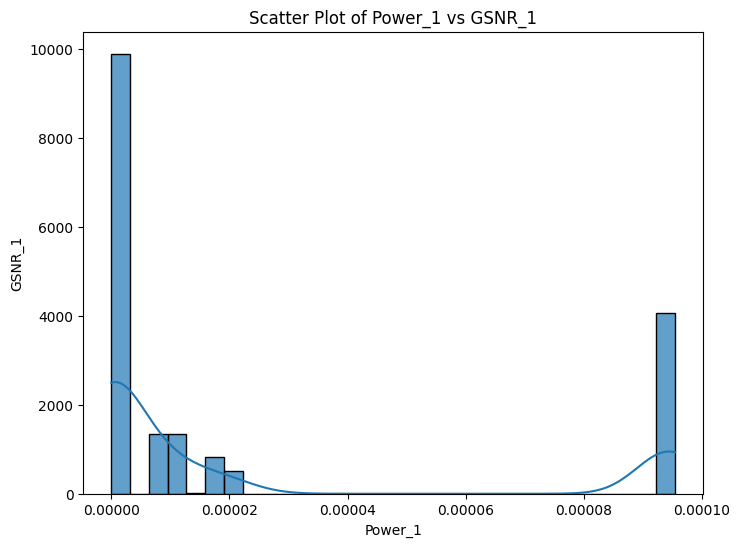

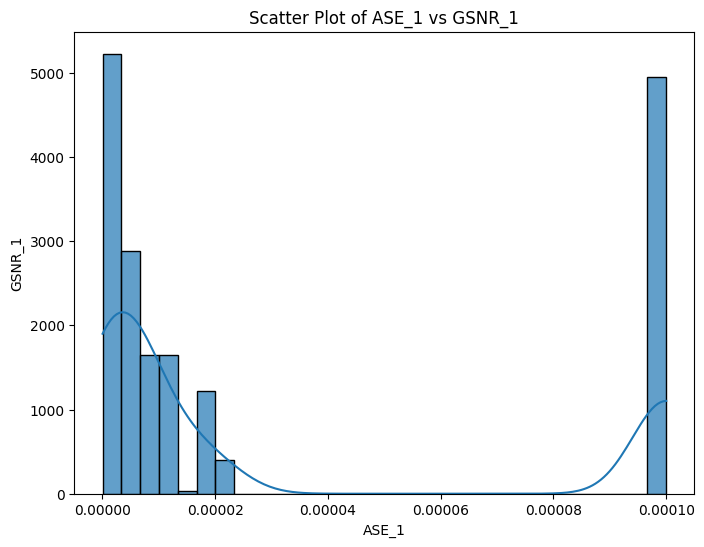

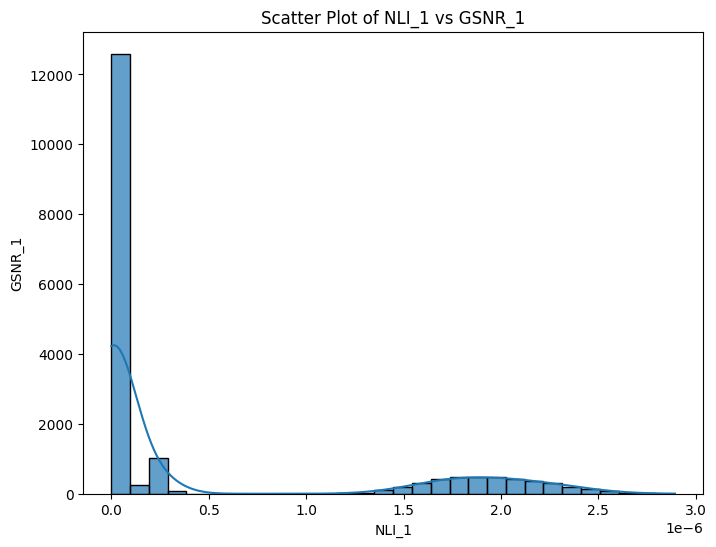

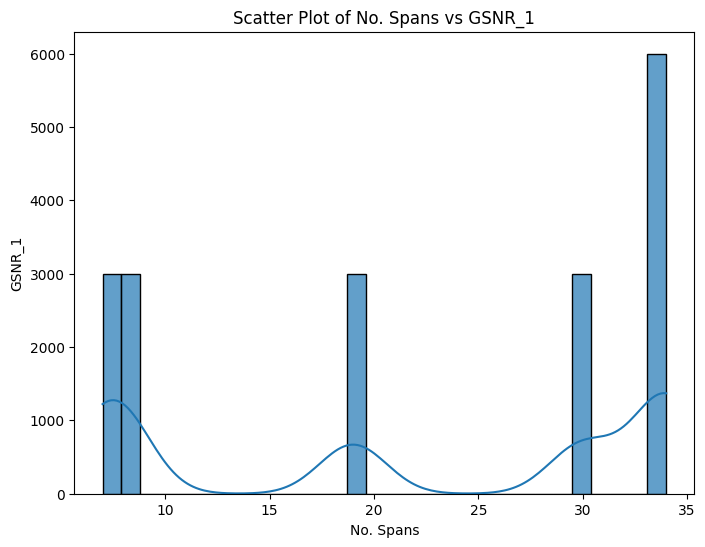

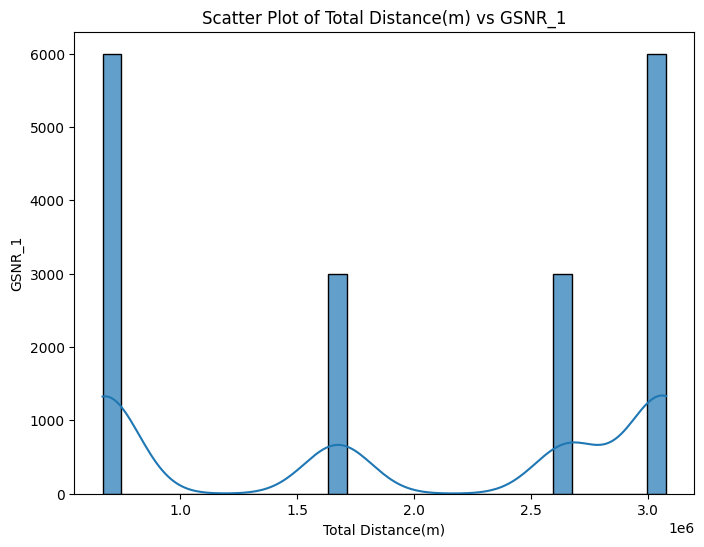

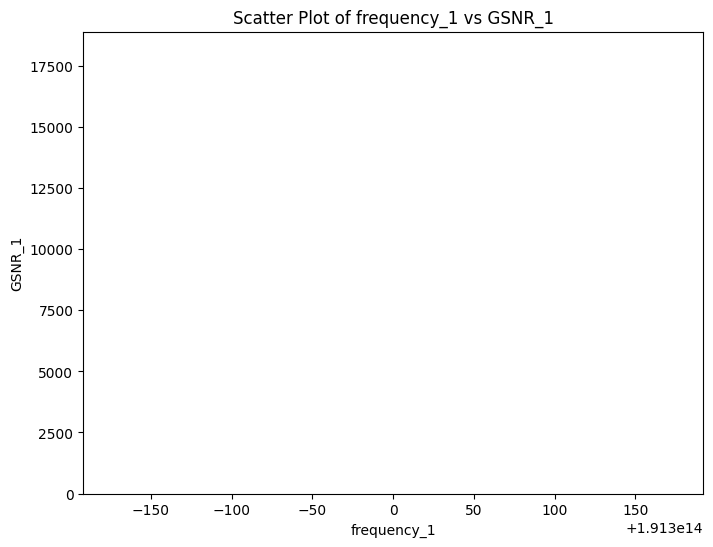

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the attribute columns and the target variable
attribute_columns = [f'Power_{i}' for i in range(1, 2)] + [f'ASE_{i}' for i in range(1, 2)] + [f'NLI_{i}' for i in range(1, 2)]+ ['No. Spans'] + ['Total Distance(m)'] + [f'frequency_{i}' for i in range(1, 2)]
target_column = 'GSNR_1'

# Assuming 'data' is your DataFrame containing attribute columns and the target variable
correlation_matrix = data[attribute_columns + [target_column]].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot histogram plots for each attribute column against the target variable
for column in attribute_columns:
    plt.figure(figsize=(8, 6))
    # sns.scatterplot(data=data, x=column, y=target_column, alpha=0.7)
    sns.histplot(data=data, x=column, kde=True, bins=30, alpha=0.7)
    plt.title(f'Scatter Plot of {column} vs {target_column}')
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()


# Normalization

In [20]:
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler

attribute_columns = [f'Power_{i}' for i in range(1, 77)] + [f'ASE_{i}' for i in range(1, 77)] + [f'NLI_{i}' for i in range(1, 77)]+ ['No. Spans'] + ['Total Distance(m)'] + [f'frequency_{i}' for i in range(1, 77)]

print(len(attribute_columns))

# MinMax Normalization
scaler = MinMaxScaler()
mxdata = scaler.fit_transform(data[attribute_columns])
mxdata = pd.DataFrame(mxdata, columns=attribute_columns)

label = data[target_column].values.reshape(-1, 1)
mydata = scaler.fit_transform(label)
mydata = pd.DataFrame(mydata, columns=[target_column])

# Z-Score Normalization
scaler = StandardScaler()
zxdata = scaler.fit_transform(data[attribute_columns])
zxdata = pd.DataFrame(zxdata, columns=attribute_columns)

zydata = scaler.fit_transform(label)
zydata = pd.DataFrame(zydata, columns=[target_column])

# Display the first few rows of the normalized data
print("MinMax Normalized Data:")
print(mxdata['Power_1'].head(),mxdata['ASE_1'].head(),mxdata['NLI_1'].head(),mxdata['frequency_1'].head(),mxdata['No. Spans'].head(),mxdata['Total Distance(m)'].head())
print(mydata.head())

print("Z-Score Normalized Data:")
print(zxdata['Power_1'].head(),mxdata['ASE_1'].head(),mxdata['NLI_1'].head(),mxdata['frequency_1'].head(),mxdata['No. Spans'].head(),mxdata['Total Distance(m)'].head())
print(zydata.head())

306
MinMax Normalized Data:
0    0.000000
1    0.000000
2    0.000000
3    0.076798
4    0.000000
Name: Power_1, dtype: float64 0    0.075117
1    0.073203
2    0.073788
3    0.000062
4    0.071547
Name: ASE_1, dtype: float64 0    0.000000
1    0.000000
2    0.000000
3    0.017928
4    0.000000
Name: NLI_1, dtype: float64 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: frequency_1, dtype: float64 0    0.037037
1    0.037037
2    0.037037
3    0.037037
4    0.037037
Name: No. Spans, dtype: float64 0    0.008849
1    0.008849
2    0.008849
3    0.008849
4    0.008849
Name: Total Distance(m), dtype: float64
    GSNR_1
0  0.00000
1  0.00000
2  0.00000
3  0.79791
4  0.00000
Z-Score Normalized Data:
0   -0.627072
1   -0.627072
2   -0.627072
3   -0.435928
4   -0.627072
Name: Power_1, dtype: float64 0    0.075117
1    0.073203
2    0.073788
3    0.000062
4    0.071547
Name: ASE_1, dtype: float64 0    0.000000
1    0.000000
2    0.000000
3    0.017928
4    0.000000
Name: NLI_1, dtype: float6

# Correlations

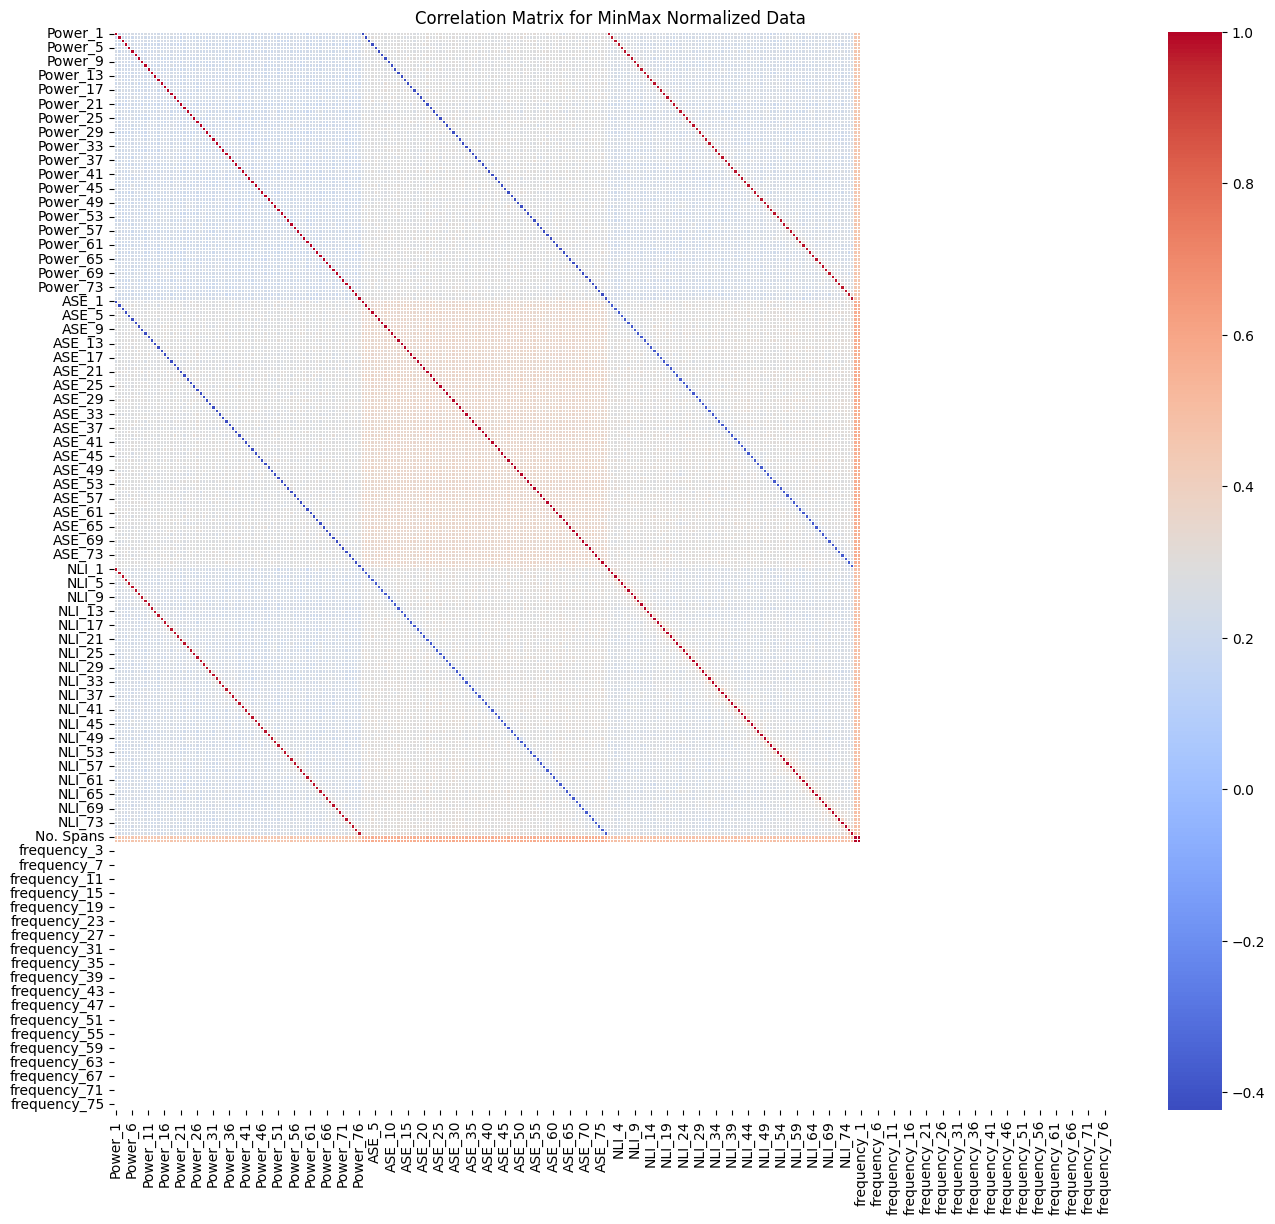

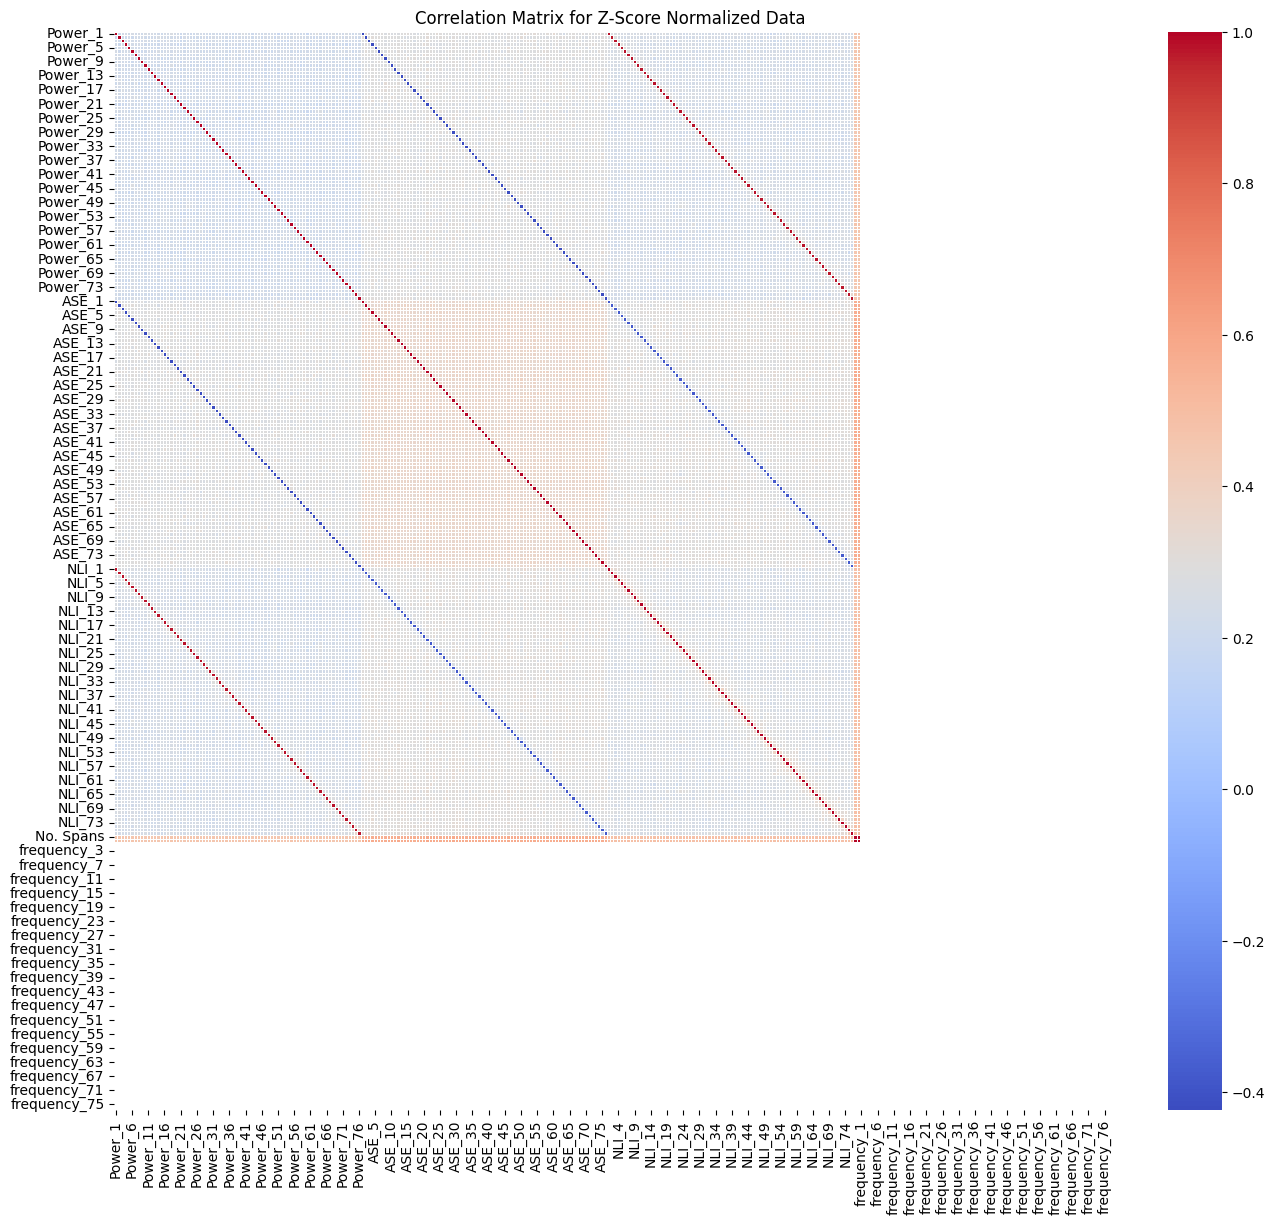

In [21]:
# Compute correlation matrices
# MinMax Normalized Data
minmax_corr_matrix = mxdata.corr()

# Z-Score Normalized Data
zscore_corr_matrix = zxdata.corr()

# Visualize correlation matrices using heatmaps
plt.figure(figsize=(16, 14))
sns.heatmap(minmax_corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for MinMax Normalized Data')
plt.show()

plt.figure(figsize=(16, 14))
sns.heatmap(zscore_corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Z-Score Normalized Data')
plt.show()

# The empty space at frequency column and row show that there is not any correlation due to constant values of freqency

# Train Test Split

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Define the function to split data according to the specified pattern
def custom_train_test_split(data, labels, samples_per_block=3000, train_samples_per_block=2500, test_samples_per_block=500):
    train_data = []
    test_data = []
    train_labels = []
    test_labels = []

    total_samples = len(data)

    for start in range(0, total_samples, samples_per_block):
        end = start + samples_per_block
        train_end = start + train_samples_per_block

        if train_end > total_samples:
            train_end = total_samples
        if end > total_samples:
            end = total_samples

        train_data.append(data[start:train_end])
        test_data.append(data[train_end:end])
        train_labels.append(labels[start:train_end])
        test_labels.append(labels[train_end:end])

    train_data = pd.concat(train_data).reset_index(drop=True)
    test_data = pd.concat(test_data).reset_index(drop=True)
    train_labels = pd.concat(train_labels).reset_index(drop=True)
    test_labels = pd.concat(test_labels).reset_index(drop=True)

    return train_data, test_data, train_labels, test_labels

# Assuming 'zxdata' and 'zydata' are your DataFrames for Z-score normalized data
attribute_columns_without_frequency = [col for col in attribute_columns if not col.startswith('frequency')]
zxdata_train, zxdata_test, zydata_train, zydata_test = custom_train_test_split(zxdata[attribute_columns_without_frequency], zydata[target_column])

# Assuming 'mxdata' and 'mydata' are your DataFrames for MinMax normalized data
mxdata_train, mxdata_test, mydata_train, mydata_test = custom_train_test_split(mxdata[attribute_columns_without_frequency], mydata[target_column])

# Display shapes to verify the split
print("Z-score normalized data:")
print("Train data shape:", zxdata_train.shape)
print("Test data shape:", zxdata_test.shape)
print("Train labels shape:", zydata_train.shape)
print("Test labels shape:", zydata_test.shape)

print("\nMinMax normalized data:")
print("Train data shape:", mxdata_train.shape)
print("Test data shape:", mxdata_test.shape)
print("Train labels shape:", mydata_train.shape)
print("Test labels shape:", mydata_test.shape)


Z-score normalized data:
Train data shape: (15000, 230)
Test data shape: (3000, 230)
Train labels shape: (15000,)
Test labels shape: (3000,)

MinMax normalized data:
Train data shape: (15000, 230)
Test data shape: (3000, 230)
Train labels shape: (15000,)
Test labels shape: (3000,)


# Models

In [23]:
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVR
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.metrics import mean_squared_error

# # Initialize regression models
# models = {
#     'Linear Regression': LinearRegression(),
#     'Ridge Regression': Ridge(),
#     'Random Forest Regression': RandomForestRegressor(),
#     'Gradient Boosting Regression': GradientBoostingRegressor(),
#     'Decision Tree Regression': DecisionTreeRegressor(),
#     'KNN Model': KNeighborsRegressor(),
#     'Support Vector Machines (SVM)': SVR(),
#     'Gaussian Regression': GaussianProcessRegressor()
# }

# # Train and evaluate each model on Z-score normalized data
# print("Z-Score Normalized Data:")
# for model_name, model in models.items():
#     model.fit(zxdata_train, zydata_train)
#     zydata_pred = model.predict(zxdata_test)
#     mse = mean_squared_error(zydata_test, zydata_pred)
#     print(f"{model_name}: Mean Squared Error = {mse:.6f}")

# # Train and evaluate each model on MinMax normalized data
# print("\nMinMax Normalized Data:")
# for model_name, model in models.items():
#     model.fit(mxdata_train, mydata_train)
#     mydata_pred = model.predict(mxdata_test)
#     mse = mean_squared_error(mydata_test, mydata_pred)
#     print(f"{model_name}: Mean Squared Error = {mse:.6f}")


In [24]:
#  import warnings
# # Suppress specific warnings
# warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names")


# # Function to predict using a single input and a trained model
# def predict_single(model, input_data):
#     prediction = model.predict([input_data])  # Input data should be a list or array-like
#     return prediction[0]

# print("\nSingle input predictions (MinMax Normalized Data):")

# #MinMax Normalized Data
# # Example usage of the predict_single function
# single_input = mxdata_test.iloc[2512]  # Using .iloc to get the first row
# print(mydata_test.iloc[2512] )

# #Visualization of comparison between actual values with the predicted ones.

# for model_name, model in models.items():
#     prediction = predict_single(model, single_input)
#     print(f"{model_name}: Prediction = {prediction:.6f}")

# print("\nSingle input predictions (Z-Score Normalized Data):")
# #Z-Score Normalized Data
# # Example usage of the predict_single function
# single_input = zxdata_test.iloc[2512]  # Using .iloc to get the first row
# print(zydata_test.iloc[2512] )

# #Visualization of comparison between actual values with the predicted ones.

# for model_name, model in models.items():
#     prediction = predict_single(model, single_input)
#     print(f"{model_name}: Prediction = {prediction:.6f}")

# Neural Network Architecture

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Function to define and compile the model
def create_model(input_shape):
    model1 = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),  # Input layer with ReLU activation
        Dense(32, activation='relu'),  # Hidden layer with ReLU activation
        Dense(32, activation='relu'),  # Hidden layer with ReLU activation
        Dense(32, activation='relu'),  # Hidden layer with ReLU activation
        Dense(1)  # Output layer (assuming regression task, no activation)
    ])

    # Compile model
    model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    return model1

# Assuming input_shape is the number of features in your data
input_shape = zxdata_train.shape[1]  # Adjust based on your data

# Create the model
modelm = create_model(input_shape)
modelz = create_model(input_shape)

# Print model summary
modelm.summary()
modelz.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                14784     
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 19009 (74.25 KB)
Trainable params: 19009 (74.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential

# HyperParameter Tuning

In [26]:
!pip install keras-tuner

In [42]:
zxdata_train.iloc[0].to_numpy()

array([-0.62707209, -0.61953994, -0.4227409 , -0.41754395, -0.42207876,
       -0.62385213, -0.43415333, -0.61955143, -0.42066029, -0.60930113,
       -0.42856025, -0.41000141, -0.42118045, -0.60877346, -0.42545152,
       -0.62768925, -0.43282424, -0.62736567, -0.62801381, -0.63168204,
       -0.59159841, -0.41315445, -0.40810722, -0.43183881, -0.61894875,
       -0.63100401, -0.41447239, -0.62257646, -0.40770085, -0.60727376,
       -0.62218707, -0.61615761, -0.62835269, -0.41954075, -0.4302526 ,
       -0.61187091, -0.63333372, -0.40837595, -0.61809934, -0.43563867,
       -0.61702447, -0.62282293, -0.61067068, -0.6316745 , -0.63454821,
       -0.61087299, -0.6196367 , -0.60089704, -0.61812713, -0.43141779,
       -0.61127885, -0.61700609, -0.62000172, -0.61489966, -0.63242379,
       -0.62095412, -0.42273032, -0.43169777, -0.63381759, -0.61695656,
       -0.41833358, -0.61633944, -0.61762659, -0.62798418, -0.60947838,
       -0.62475646, -0.43959997, -0.6153227 , -0.42831101, -0.62

In [44]:
zxdata_train.columns.tolist()

['Power_1',
 'Power_2',
 'Power_3',
 'Power_4',
 'Power_5',
 'Power_6',
 'Power_7',
 'Power_8',
 'Power_9',
 'Power_10',
 'Power_11',
 'Power_12',
 'Power_13',
 'Power_14',
 'Power_15',
 'Power_16',
 'Power_17',
 'Power_18',
 'Power_19',
 'Power_20',
 'Power_21',
 'Power_22',
 'Power_23',
 'Power_24',
 'Power_25',
 'Power_26',
 'Power_27',
 'Power_28',
 'Power_29',
 'Power_30',
 'Power_31',
 'Power_32',
 'Power_33',
 'Power_34',
 'Power_35',
 'Power_36',
 'Power_37',
 'Power_38',
 'Power_39',
 'Power_40',
 'Power_41',
 'Power_42',
 'Power_43',
 'Power_44',
 'Power_45',
 'Power_46',
 'Power_47',
 'Power_48',
 'Power_49',
 'Power_50',
 'Power_51',
 'Power_52',
 'Power_53',
 'Power_54',
 'Power_55',
 'Power_56',
 'Power_57',
 'Power_58',
 'Power_59',
 'Power_60',
 'Power_61',
 'Power_62',
 'Power_63',
 'Power_64',
 'Power_65',
 'Power_66',
 'Power_67',
 'Power_68',
 'Power_69',
 'Power_70',
 'Power_71',
 'Power_72',
 'Power_73',
 'Power_74',
 'Power_75',
 'Power_76',
 'ASE_1',
 'ASE_2',
 

In [50]:
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming zxdata_train and zxdata_test are pandas DataFrames

# Define the label column
label_column = 'label'  # Adjust this to your actual label column name

# Extract features and labels
train_features = zxdata_train.to_numpy()  # Adjust 'label' to your actual label column name
train_labels = zydata_train.to_numpy()
test_features = zxdata_test.to_numpy()  # Adjust 'label' to your actual label column name
test_labels = zydata_test.to_numpy()

# Function to define the hypermodel
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=512, step=32),
                    activation=hp.Choice('activation1', values=['relu', 'tanh']),
                    input_shape=(train_features.shape[1],)))

    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                        activation=hp.Choice(f'activation_{i}', values=['relu', 'tanh'])))

    model.add(Dense(1))  # Output layer for regression task

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd']),
                  loss='mean_squared_error',
                  metrics=['mae'])

    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=10,  # You can adjust the number of trials based on your requirements
    executions_per_trial=3,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

# Run the hyperparameter search
tuner.search(train_features, train_labels,
             epochs=10,
             validation_data=(test_features, test_labels),
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

# Retrieve the best model and compare
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_features, train_labels,
                    epochs=50,
                    validation_data=(test_features, test_labels),
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])
val_loss, val_mae = model.evaluate(test_features, test_labels)

print(f"Best hyperparameters: {best_hps.values}")
print(f"Validation MAE: {val_mae}")


Trial 10 Complete [00h 01m 57s]
val_mae: 0.1544504463672638

Best val_mae So Far: 0.047601876159509025
Total elapsed time: 00h 21m 43s
Epoch 1/50
469/469 [==============================] - 7s 12ms/step - loss: 0.3813 - mae: 0.3531 - val_loss: 0.0358 - val_mae: 0.1310
Epoch 2/50
469/469 [==============================] - 6s 13ms/step - loss: 0.0137 - mae: 0.0728 - val_loss: 0.0059 - val_mae: 0.0534
Epoch 3/50
469/469 [==============================] - 4s 10ms/step - loss: 0.1808 - mae: 0.2107 - val_loss: 0.0108 - val_mae: 0.0708
Epoch 4/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0093 - mae: 0.0544 - val_loss: 0.0036 - val_mae: 0.0406
Epoch 5/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0940 - mae: 0.1136 - val_loss: 0.9349 - val_mae: 0.6151
Epoch 6/50
469/469 [==============================] - 5s 10ms/step - loss: 0.3772 - mae: 0.3401 - val_loss: 0.9329 - val_mae: 0.5794
Epoch 7/50
94/94 [==============================] - 0s 4ms/step - l

## Training

Epoch 1/50
235/235 [==============================] - 2s 4ms/step - loss: 0.0342 - mae: 0.1132 - val_loss: 0.0014 - val_mae: 0.0282
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 8.7778e-04 - mae: 0.0212 - val_loss: 7.1738e-04 - val_mae: 0.0193
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 4.8995e-04 - mae: 0.0157 - val_loss: 5.2791e-04 - val_mae: 0.0166
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 4.4106e-04 - mae: 0.0146 - val_loss: 4.6237e-04 - val_mae: 0.0150
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 3.7664e-04 - mae: 0.0134 - val_loss: 3.6064e-04 - val_mae: 0.0133
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 2.9285e-04 - mae: 0.0117 - val_loss: 3.1931e-04 - val_mae: 0.0129
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 2.4994e-04 - mae: 0.0109 - val_loss: 2.4885e-04 - val_mae: 0.0111
Epoch 8/50
235/235 [========

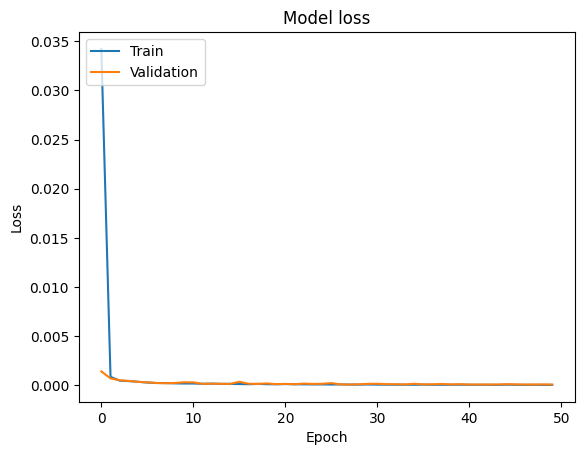

Epoch 1/50
235/235 [==============================] - 2s 4ms/step - loss: 0.7292 - mae: 0.5897 - val_loss: 0.4648 - val_mae: 0.4435
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2493 - mae: 0.2891 - val_loss: 0.0906 - val_mae: 0.1957
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0509 - mae: 0.1295 - val_loss: 0.0722 - val_mae: 0.1686
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0282 - mae: 0.0961 - val_loss: 0.0189 - val_mae: 0.0867
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0116 - mae: 0.0654 - val_loss: 0.0085 - val_mae: 0.0614
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0081 - mae: 0.0541 - val_loss: 0.0082 - val_mae: 0.0598
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0057 - mae: 0.0469 - val_loss: 0.0116 - val_mae: 0.0670
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.

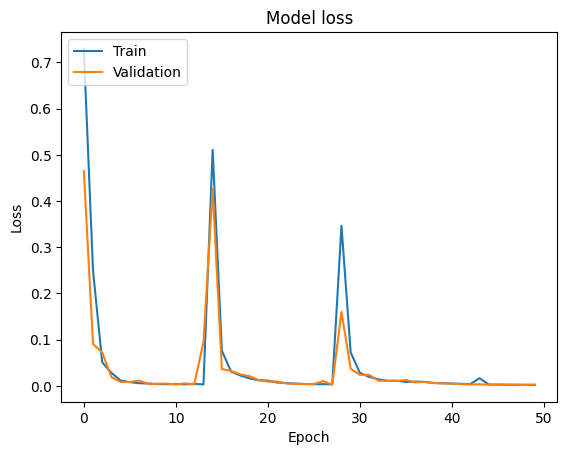

In [51]:
#Min Max Normalized Data
history = modelm.fit(mxdata_train, mydata_train, epochs=50, batch_size=64, validation_data=(mxdata_test, mydata_test))
loss, mae = modelm.evaluate(mxdata_test, mydata_test)
print(f'Test Loss: {loss:.4f}, Test MAE: {mae:.4f}')
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Z-Score Normalized Data
history = modelz.fit(zxdata_train, zydata_train, epochs=50, batch_size=64, validation_data=(zxdata_test, zydata_test))
loss, mae = modelz.evaluate(zxdata_test, zydata_test)
print(f'Test Loss: {loss:.4f}, Test MAE: {mae:.4f}')
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### Evaluation

In [53]:
import warnings
import numpy as np

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names")

print("\nSingle input predictions (MinMax Normalized Data):")

# MinMax Normalized DataZ
single_input_minmax = mxdata_test.iloc[2012]  # Using .iloc to get the first row
single_input_minmax = np.array(single_input_minmax).reshape(1, 230)
print("Actual Value:", mydata_test.iloc[2012])  # Assuming mydata_test contains actual values

# Making prediction
prediction_minmax = modelm.predict(single_input_minmax)
predicted_value_minmax = prediction_minmax[0][0]  # Extracting the scalar prediction from the 2D array
print(f"Neural Network Output: Prediction = {predicted_value_minmax:.6f}")

print("\nSingle input predictions (Z-Score Normalized Data):")

# Z-Score Normalized Data
single_input_zscore = zxdata_test.iloc[2012]  # Using .iloc to get the first row
single_input_zscore = np.array(single_input_zscore).reshape(1, 230)
print("Actual Value:", zydata_test.iloc[2012])  # Assuming zydata_test contains actual values

# Making prediction
prediction_zscore = modelz.predict(single_input_zscore)
predicted_value_zscore = prediction_zscore[0][0]  # Extracting the scalar prediction from the 2D array
print(f"Neural Network Output: Prediction = {predicted_value_zscore:.6f}")



Single input predictions (MinMax Normalized Data):
Actual Value: 0.15275277347463775
1/1 [==============================] - 0s 110ms/step
Neural Network Output: Prediction = 0.161724

Single input predictions (Z-Score Normalized Data):
Actual Value: -0.10052792635315952
1/1 [==============================] - 0s 30ms/step
Neural Network Output: Prediction = -0.058666


# Conclusion

**Random Forest Regression and Gradient Boosting Regression:**

1. These ensemble methods are known for their robustness and ability to handle complex relationships in data.

2. They work by combining multiple decision trees, which allows them to capture intricate patterns in the data.

3. Both models are less prone to overfitting compared to single decision trees because they use techniques like bagging (Random Forest) and boosting (Gradient Boosting) to aggregate predictions from multiple weak learners.

**Decision Tree Regression:**

1. Decision trees are simple yet powerful models that partition the feature space based on the values of input features.

2. They can capture complex relationships and interactions between features, leading to low MSE values.

3. Decision trees tend to overfit the training data, but in this case, the low MSE suggests that the trees were pruned effectively or ensemble methods were used (like Random Forest or Gradient Boosting) to mitigate overfitting.

**Support Vector Machines (SVM):**

1. SVM aims to find the hyperplane that best separates the classes in the feature space.

2. In regression tasks, SVM tries to find a hyperplane that best fits the data, while also maximizing the margin between instances.

3. SVM tends to perform well when there is a clear margin of separation between classes or when the data is linearly separable.

**Lasso Regression:**

1. Lasso Regression adds a penalty term (L1 regularization) to the ordinary least squares objective function, which penalizes large coefficients.

2. The high MSE for Lasso Regression on Z-Score Normalized data suggests that it may have penalized too many coefficients, resulting in underfitting or inability to capture important features.

**Gaussian Regression:**

1. Gaussian Process Regression is a non-parametric Bayesian approach that models the target variable as a Gaussian process.

2. It can capture complex relationships and uncertainties in the data, which might have contributed to its relatively low MSE values.